In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
df=pd.read_csv('/content/gold.csv',parse_dates=['Date'],index_col=['Date'])

In [ ]:
series = df['USD (AM)'].dropna()

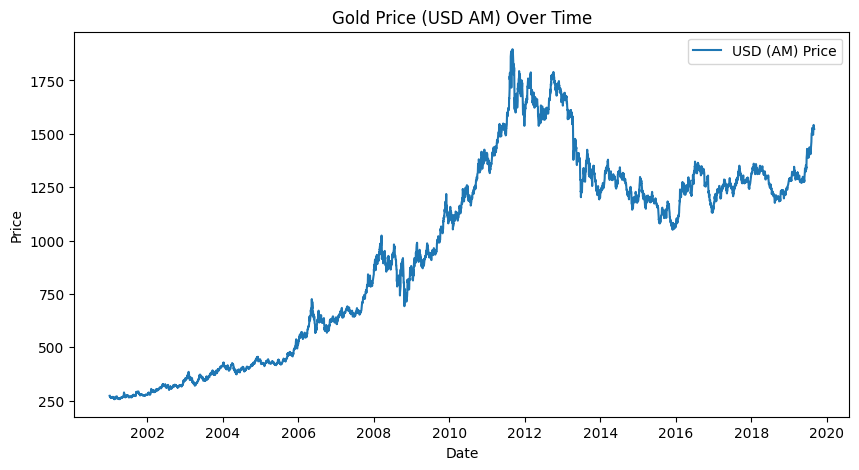

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(series, label="USD (AM) Price")
plt.title("Gold Price (USD AM) Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

    if result[1] < 0.05:
         print("❌ Reject the null hypothesis: The series is stationary.")
    else:

        print("✅ Fail to reject the null hypothesis: The series is non-stationary.")

In [ ]:
print("Before Differencing:")
check_stationarity(series)

Before Differencing:
ADF Statistic: -1.0653629752531542
p-value: 0.7286853153924067
Critical Values: {'1%': -3.4317462624364112, '5%': -2.862156987914191, '10%': -2.567098424977626}
✅ Fail to reject the null hypothesis: The series is non-stationary.


In [ ]:
df['USD (AM) Diff'] = df['USD (AM)'].diff().dropna()

In [ ]:
print("\nAfter Differencing:")
check_stationarity(df['USD (AM) Diff'].dropna())


After Differencing:
ADF Statistic: -13.576424711442268
p-value: 2.1651705729972953e-25
Critical Values: {'1%': -3.4317462624364112, '5%': -2.862156987914191, '10%': -2.567098424977626}
❌ Reject the null hypothesis: The series is stationary.


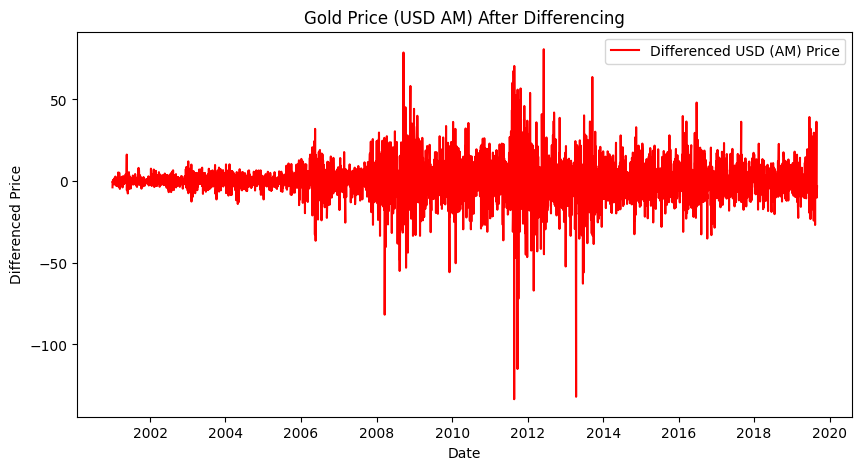

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['USD (AM) Diff'], label="Differenced USD (AM) Price", color='red')
plt.title("Gold Price (USD AM) After Differencing")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()
plt.show()